# Image Files and Paths

An image is stored as a file on your computer. Below, we define my_image as the filename of a file in this directory.

A filename consists of two parts: the name of the file and the extension, separated by a full stop (.). The extension specifies the format of the Image. There are two popular image formats: Joint Photographic Expert Group image (or .jpg, .jpeg) and Portable Network Graphics (or .png). These file types make it simpler to work with images. For example, it compresses the image, taking less spaces on your drive to store the image.

In [1]:
my_image = "balloon.jpeg"

Image files are stored in the file system of your computer. The location of it is specified using a "path", which is often unique. You can find the path of your current working directory with Python's os module. The os module provides functions to interact with the file system, e.g. creating or removing a directory (folder), listing its contents, changing and identifying the current working directory.

In [2]:
import os
cwd = os.getcwd()
cwd

'c:\\Users\\Acer\\Desktop\\year3\\2\\CPE382\\Assignment\\Lab1'

The "path" to an image can be found using the following line of code.

In [3]:
image_path = os.path.join(cwd, my_image)
image_path

'c:\\Users\\Acer\\Desktop\\year3\\2\\CPE382\\Assignment\\Lab1\\balloon.jpeg'

# Load Images in Python

## Pillow Library (PIL)

Pillow (PIL) library is a popular library for loading images in Python. In addition, many other libraries such as "Keras" and "PyTorch" use this library to work with images. The Image module provides functions to load images from and saving images to the file system. Let's import it from PIL.

In [4]:
from PIL import Image

If the image is in the current working directory, you can load the image as follows using the image's filename and create a PIL Image object. You can also load the image using its full path. This comes in handy if the image is not in your working directory.

In [5]:
image = Image.open(image_path)
type(image)

PIL.JpegImagePlugin.JpegImageFile

If you are working in a Jupyter environment, you can view the image by calling the variable itself.

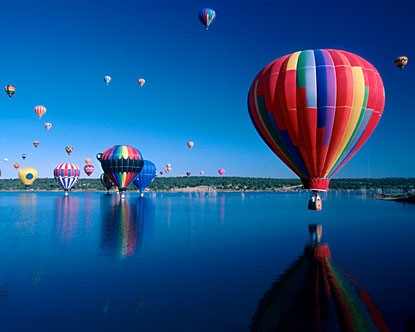

In [6]:
image

## OpenCV Library

OpenCV is a library used for computer vision. It has more functionality than the PIL library but is more difficult to use. We can import OpenCV as follows:

In [7]:
import cv2

The <code>imread()</code> method loads an image from the specified file, the input is the <code>path</code> of the image to be read (just like PIL), the <code>flag</code> paramter specifies how the image should be read, and the default value is <code>cv2.IMREAD_COLOR</code>.


In [35]:
image = cv2.imread(my_image)

The result is a numpy array with intensity values as 8-bit unsigned integers.

In [36]:
type(image)

numpy.ndarray

We can get the shape of the array from the shape attribute.

In [37]:
image.shape

(332, 415, 3)

The shape is the same as the PIL array, but there are several differences; for example, PIL returns in (R, G, B) format whereas OpenCV returns in (B, G, R) format.

Each pixel could take on 256 possible values as intensity, ranging from 0 to 255, with 0 being the lowest intensity and 255 being the highest. The maximum and minimum intensity values of an image can be obtained, respectively, by calling:

In [38]:
image.max()

255

and

In [39]:
image.min()

0

# Plotting an Image

## Pillow Library (PIL)

We can also use the method show of PIL objects to display the image. Please note this method may or may not work depending on your setup.

In [9]:
image.show()

You can also use imshow method from the matplotlib library to display the image.

In [10]:
import matplotlib.pyplot as plt

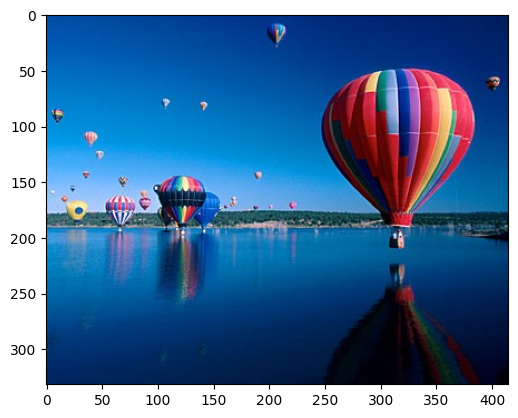

In [11]:
plt.imshow(image)
plt.show()

We can use the attributes of the image object to get information. The attribute format is the extension or format of the image.

The attribute size returns a tuple, the first element is the number of pixels that comprise the width and the second element is the number of pixels that make up the height of the image.

In [12]:
print(image.size)

(415, 332)


This is a string specifying the pixel format used. In this case, it's “RGB”. RGB is a color space where red, green, and blue are added together to produce other colors.

In [13]:
print(image.mode)

RGB


The Image.open method does not load image data into the computer memory. The load method of PIL object reads the file content, decodes it, and expands the image into memory.

In [14]:
im = image.load()

We can then check the intensity of the image at the  x -th column and  y -th row:

In [15]:
x = 0
y = 1
im[y,x]

(2, 76, 165)

You can save the image in jpg format using the following command.

In [17]:
image.save("copy_balloon.jpg")

## OpenCV Library

You can use OpenCV's imshow function to open the image in a new window using the `imshow` function from the `matplotlib` library:

In [40]:
import matplotlib.pyplot as plt

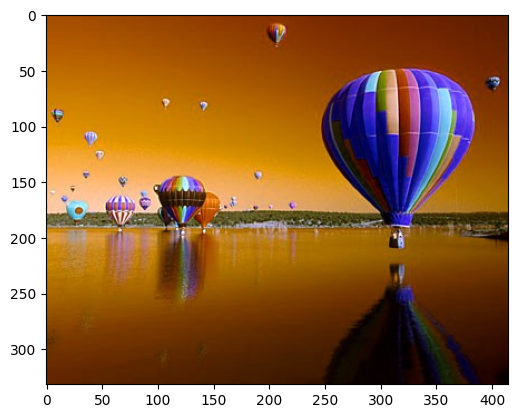

In [41]:
plt.imshow(image)
plt.show()

The image output doesn't look natural. This is because the order of RGB Channels are different. We can change the color space with conversion code and the function `cvtColor` from the `cv2` library:

In [42]:
new_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

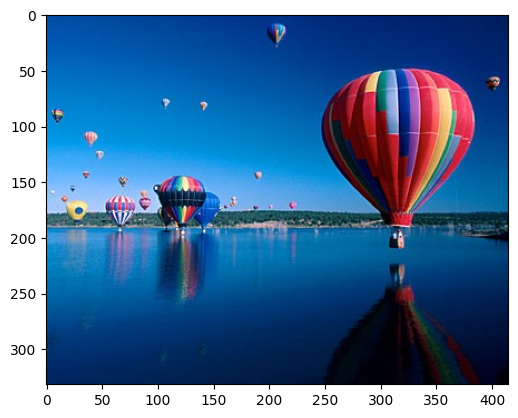

In [43]:
plt.imshow(new_image)
plt.show()

You can also load the image using its path, this comes in handy if the image is not in your working directory:

In [ ]:
image = cv2.imread(image_path)
image.shape

(332, 415, 3)

You can save the image using `imwrite`.


In [ ]:
cv2.imwrite("copy_balloon.jpg", image)

# Grayscale Images and Color Channels

## Grayscale Images

### Pillow Library (PIL)

The ImageOps module contains several ‘ready-made’ image processing operations. This module is somewhat experimental, and most operators only work with grayscale and/or RGB images.

In [18]:
from PIL import ImageOps

Grayscale images have pixel values representing the amount of light or intensity of that pixel. Light shades of gray have a high-intensity while darker shades have a lower intensity, i.e, white has the highest intensity and black the lowest.

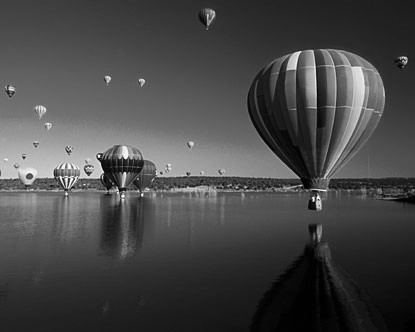

In [19]:
image_gray = ImageOps.grayscale(image)
image_gray

The mode is L for grayscale.

In [20]:
image_gray.mode

'L'

### OpenCV Library

Grayscale images have pixel values representing the amount of light or intensity. Light shades of gray have a high-intensity darker shades have a lower intensity. White has the highest intensity, and black the lowest. We can convert an image to Gray Scale using a color conversion code and the function <code>cvtColor</code>.


The code for RGB to gray is <code>cv2.COLOR_BGR2GRAY</code>, we apply the function:


In [44]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

The image array has only two dimensions, i.e. only one color channel:

In [45]:
image_gray.shape

(332, 415)

We can plot the image using `imshow` but we have to specify the color map is gray:

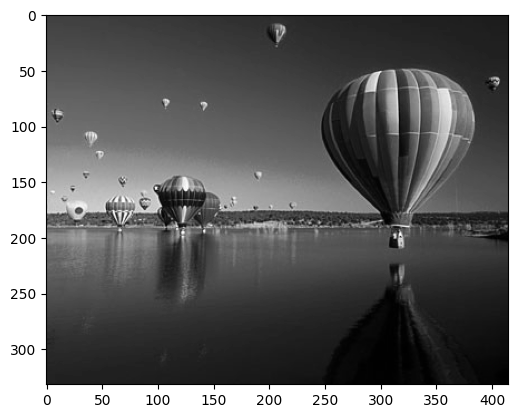

In [46]:
plt.imshow(image_gray, cmap='gray')
plt.show()

We can save the image as a grayscale image, let's save it as a `jpg` as well, in the working directory.

In [47]:
cv2.imwrite('balloon_gray_cv.jpg', image_gray)

True

You can also load in a grayscale image:


In [48]:
im_gray = cv2.imread('balloon_gray_cv.jpg')

We can plot the image:

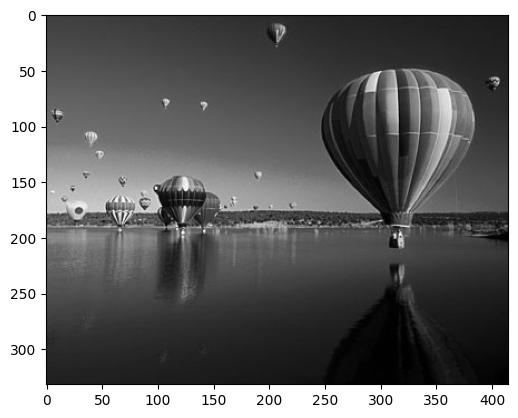

In [49]:
plt.imshow(im_gray,cmap='gray')
plt.show()

## Color Channels

### Pillow Library (PIL)

We can also work with the different color channels. Consider the following image:

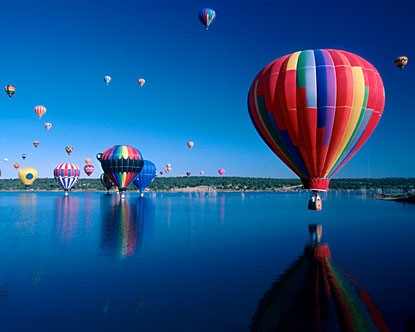

In [21]:
image = Image.open(image_path)
image

We can obtain the different RGB color channels and assign them to the variables red, green, and blue:

In [22]:
red, green, blue = image.split()

Plotting the color image next to the red channel as a grayscale, we see that regions with red have higher intensity values.

In [23]:
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

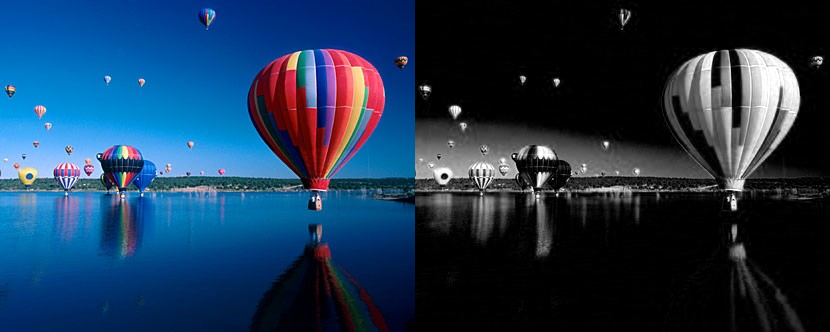

In [24]:
get_concat_h(image, red)

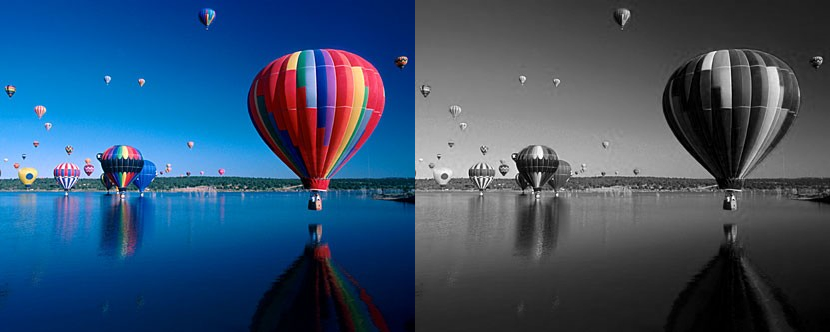

In [25]:
get_concat_h(image, green)

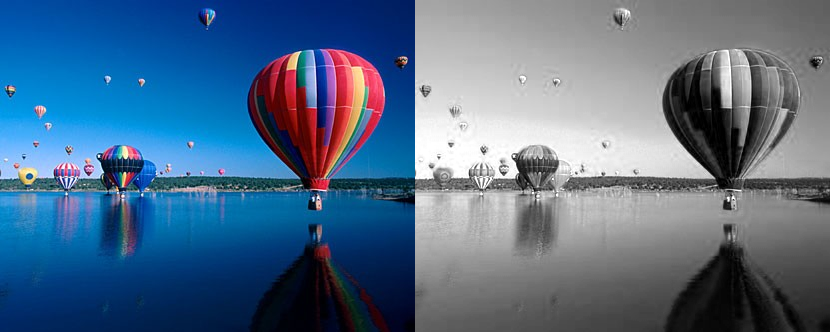

In [26]:
get_concat_h(image, blue)

### PIL Images into NumPy Arrays

NumPy is a library for Python, allowing you to work with multi-dimensional arrays and matrices. We can convert a PIL image to a NumPy array. We use <code>asarray()</code> or <code>array</code> function from NumPy to convert PIL images into NumPy arrays.

First, let's import the numpy module:


In [27]:
import numpy as np

We apply it to the PIL image we get a numpy array:

In [28]:
array= np.asarray(image)
print(type(array))

<class 'numpy.ndarray'>


`np.asarray` turns the original image into a numpy array. Often, we don't want to manipulate the image directly, but instead, create a copy of the image to manipulate. The `np.array` method creates a new copy of the image, such that the original one will remain unmodified.


In [29]:
array = np.array(image)

The attribute  <code>shape</code> of a `numpy.array` object returns a tuple corresponding to the dimensions of it, the first element gives the number of rows or height of the image,  the second is element is the number of columns or width of the image. The final element is the number of colour channels.


In [30]:
print(array.shape)

(332, 415, 3)


or <code>(rows, columns, colors)</code>. Each element in the color axis  corresponds to the following value  <code>(R, G, B)</code> format.


We can view the intensity values by printing out the array, they range from 0 to 255 or $2^{8}$ (8-bit).


In [31]:
print(array)

[[[  2  76 165]
  [  2  76 165]
  [  2  76 165]
  ...
  [  0  29  95]
  [  0  29  95]
  [  0  29  95]]

 [[  2  76 165]
  [  2  76 165]
  [  2  76 165]
  ...
  [  0  29  95]
  [  0  29  95]
  [  0  29  95]]

 [[  1  77 165]
  [  1  77 165]
  [  1  77 165]
  ...
  [  0  29  95]
  [  0  29  95]
  [  0  29  95]]

 ...

 [[  0  37  99]
  [  0  37  99]
  [  0  38  97]
  ...
  [  0   1   6]
  [  0   0   8]
  [  0   0   8]]

 [[  0  39  98]
  [  0  39  98]
  [  0  39  98]
  ...
  [  0   0   8]
  [  0   0  10]
  [  0   0  10]]

 [[  0  39  98]
  [  0  39  98]
  [  0  39  98]
  ...
  [  0   0  10]
  [  0   0  10]
  [  0   0  10]]]


The Intensity values are 8-bit unsigned datatype.

In [32]:
array[0, 0]

array([  2,  76, 165], dtype=uint8)

In [33]:
array.min()

0

In [34]:
array.max()

255

### OpenCV Library

We can also work with the different color channels. Consider the following image:

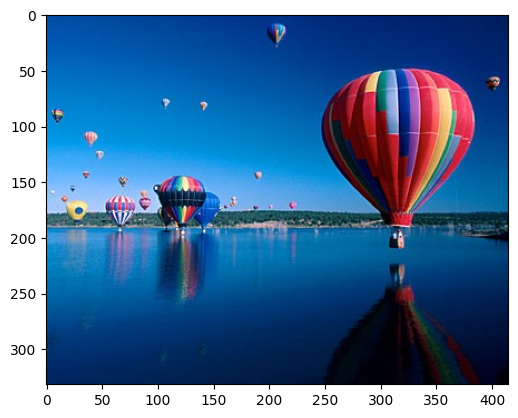

In [50]:
balloon = cv2.imread('balloon.jpeg')
plt.imshow(cv2.cvtColor(balloon, cv2.COLOR_BGR2RGB))
plt.show()

We can obtain the different RGB colors and assign them to the variables blue, green, and red, in (B, G, R) format.

In [51]:
blue, green, red = balloon[:, :, 0], balloon[:, :, 1], balloon[:, :, 2]

We can concatenate each image channel the images using the function <code>vconcat</code>.


In [52]:
im_bgr = cv2.vconcat([blue, green, red])

Plotting the color image next to the red channel in grayscale, we see that regions with red have higher intensity values.

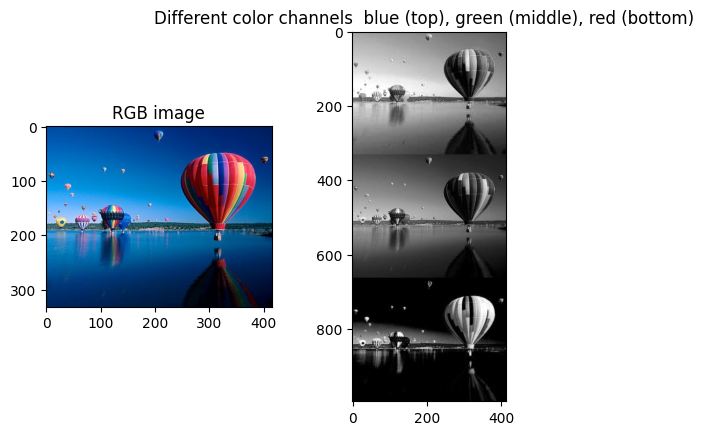

In [53]:
plt.subplot(121)
plt.imshow(cv2.cvtColor(balloon, cv2.COLOR_BGR2RGB))
plt.title("RGB image")
plt.subplot(122)
plt.imshow(im_bgr,cmap='gray')
plt.title("Different color channels  blue (top), green (middle), red (bottom)  ")
plt.show()

We can use numpy slicing. For example, we can return the first 256 rows corresponding to the top half of the image:


In [54]:
rows = 256

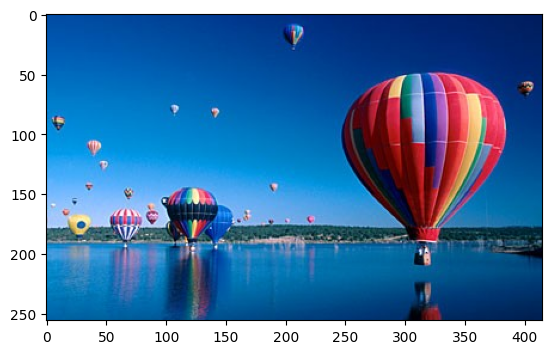

In [55]:
plt.imshow(new_image[0:rows,:,:])
plt.show()

We can also return the first 256 columns corresponding to the first half of the image:

In [56]:
columns = 256

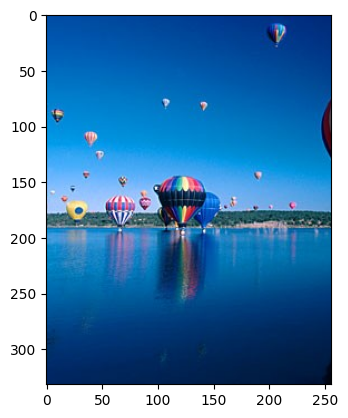

In [57]:
plt.imshow(new_image[:,0:columns,:])
plt.show()

If you want to reassign an array to another variable, you should use the copy method (we will cover this in the next section).

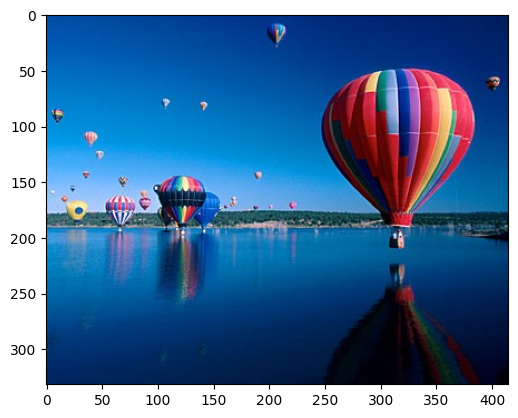

In [58]:
A = new_image.copy()
plt.imshow(A)
plt.show()

If we do not apply the method `copy()`, the variable will point to the same location in memory. Consider the variable B below, if we set all values of array A to zero, since A and B points to the same object in the memory, B will also have all-zero elements:

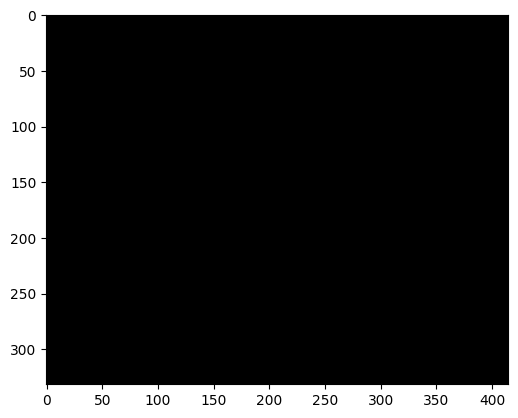

In [59]:
B = A
A[:,:,:] = 0
plt.imshow(B)
plt.show()

We can also manipulate elements using indexing. In the following piece of code, we create a new array `balloon_red` and set all but the red color channels to zero. Therefore, when we display the image, it appears red:


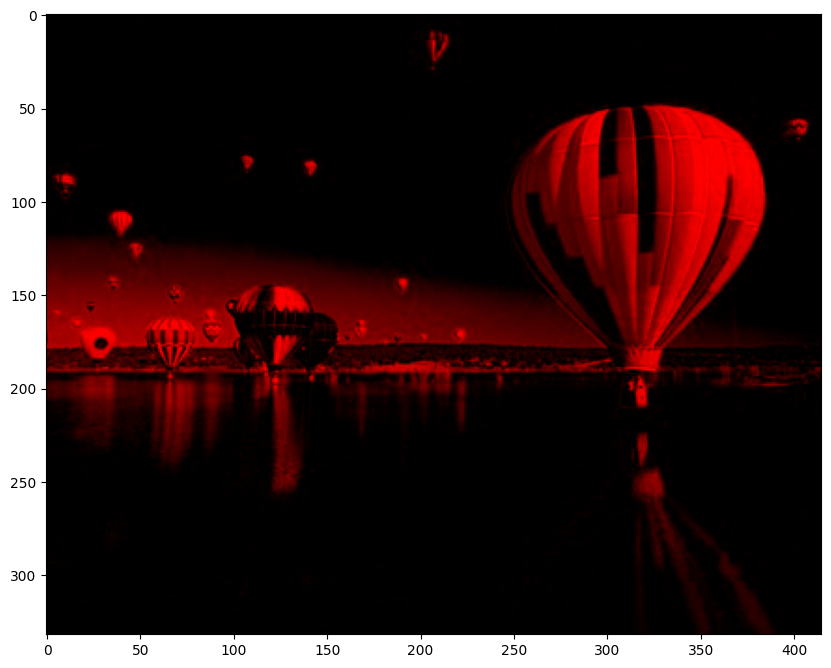

In [60]:
balloon_red = balloon.copy()
balloon_red[:, :, 0] = 0
balloon_red[:, :, 1] = 0
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(balloon_red, cv2.COLOR_BGR2RGB))
plt.show()